Programming Assignment - 2
---
Name: Patrick McElroy
---

## Question 1
---
Modify the textual data example from class to convert the document-term matrix into TF-IDF (term-frequency inverse document frequency) matrix by using basic NumPy operations where

>- Term-frequency (of a word in a document) is frequency of the word in a document divided by total number of words in the document.

>- Inverse document frequency of a word (all documents under consideration) is the natural log of (total number of documents/number of documents having the given word).

>- tf-idf(t, d) = tf(t,d)*idf(t) ; 

**Display the dense output for the tf-idf matrix for the example taken in class.**

In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

In [31]:
# Your code comes here
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
## Example Documents: Amazon review of Taco vs Burrito
document1 = " I bought this game as a gift for my 8 year old daughter who loves games. I was expecting lots of gross foods--but I was surprised at the inappropriate cards--eyeball, human burger, blood salsa, and fresh brains. Those are not foods that typical people find in their refrigerators. We do not practice cannibalism. She was very upset when I suggested that we just take out those cards. I seriously wonder who thinks that those cards are appropriate for kids. The rest of the game is funny, but I wish I would have looked through the cards before I gave it to her."
document2 = "Absolutely love Taco vs burrito. I️ bought it as a kickstarter. I️ originally bought this game because my husband and I️ love to play games with friends but most of them are not targeted to children so I️ got this to add to our collection so we had options when our friends with kids came. I’m not gonna lie I️ did No have high expectations for this to be a game for adult but I️ was Sooooo wrong!!!!!! We have now played with several different groups of friends and it’s a hit!!!!! With adults it becomes a major strategy game. I️ have Now bought it as a Christmas present bc it was so well received!!!!"
document3 = " Unlike several of the reviewers here, I didn't purchase this originally for when kids are around. I bought it because of the reviews that said the adults all loved it too! I'm always on the lookout for games playable by 2 people and this was a great one. It's incredibly simple, but brings a lot of laughs with the competition and sabotage. I'm really glad I gave this game a chance."
doc_list = [document1, document2, document3]

## Create a bag of words
bow = vectorizer.fit_transform(doc_list)
#print("The data type holding a document-term matrix",type(bow))
#print ("Feature (terms) Names: \n",vectorizer.get_feature_names_out())
## Create a TF-IDF matrix
X = bow.toarray()

TF = np.zeros(np.shape(X))

for i in range(3):
    TF[i] = np.divide(X[i], X[i].sum())
print(TF.shape)
    
Y = np.where(X>=1, 1, 0)
print(Y)
DN = np.sum(Y, axis = 0)
print(DN)
IDF = np.log(3/DN)
print(IDF.shape)

TF_IDF = np.dot(TF, IDF)
print(TF_IDF.shape)
print(TF_IDF)



(3, 96)
[[0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0
  0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
  1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1]
 [1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0
  1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
  0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
  0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
[1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(96,)
(3,)
[0.94573772 0.88211883 0.84264665]


---
## Question 2

IRIS flower dataset is one of the widely used resources. Load the IRIS data by using following code

>- Normalize this data by using z-scoring ($z  = (x - \mu)/\sigma$). Don't use loops. You can use np.mean(), np.std() and basic matrix operation with broadcasting. 

>- Visualize the distribution of the normalized data using Matplotlib or other packages. 


In [44]:
# Python code
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris().data

In [45]:
print(iris.shape)

(150, 4)


In [46]:
Z1 = (iris[:,0] - np.mean(iris[:,0]))/np.std(iris[:,0])
Z2 = (iris[:,1] - np.mean(iris[:,1]))/np.std(iris[:,1])
Z3 = (iris[:,2] - np.mean(iris[:,2]))/np.std(iris[:,2])
Z4 = (iris[:,3] - np.mean(iris[:,3]))/np.std(iris[:,3])

Text(1, 1, '$\\sigma=0.76$')

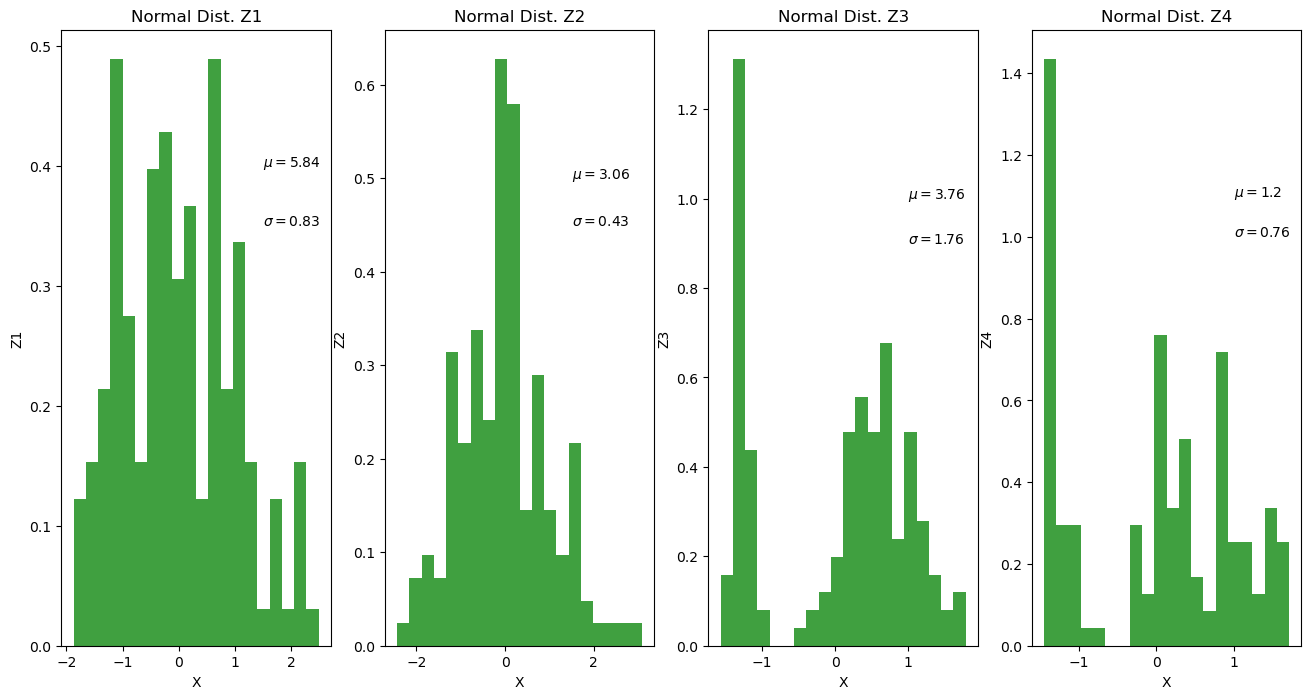

In [61]:
fig = plt.figure(figsize = (16, 8))

fig.add_subplot(1, 4, 1)
plt.hist(Z1, 20, density=True, facecolor='g', alpha=0.75)
plt.title('Normal Dist. Z1')
plt.xlabel('X')
plt.ylabel('Z1')
plt.text(1.5, .4, fr'$\mu={round(np.mean(iris[:, 0]), 2)}$')
plt.text(1.5, 0.35, fr'$\sigma={round(np.std(iris[:, 0]), 2)}$')

fig.add_subplot(1, 4, 2)
plt.hist(Z2, 20, density=True, facecolor='g', alpha=0.75)
plt.title('Normal Dist. Z2')
plt.xlabel('X')
plt.ylabel('Z2')
plt.text(1.5, .5, fr'$\mu={round(np.mean(iris[:, 1]), 2)}$')
plt.text(1.5, 0.45, fr'$\sigma={round(np.std(iris[:, 1]), 2)}$')

fig.add_subplot(1, 4, 3)
plt.hist(Z3, 20, density=True, facecolor='g', alpha=0.75)
plt.title('Normal Dist. Z3')
plt.xlabel('X')
plt.ylabel('Z3')
plt.text(1, 1, fr'$\mu={round(np.mean(iris[:, 2]), 2)}$')
plt.text(1, 0.9, fr'$\sigma={round(np.std(iris[:, 2]), 2)}$')

fig.add_subplot(1, 4, 4)
plt.hist(Z4, 20, density=True, facecolor='g', alpha=0.75)
plt.title('Normal Dist. Z4')
plt.xlabel('X')
plt.ylabel('Z4')
plt.text(1, 1.1, fr'$\mu={round(np.mean(iris[:, 3]), 2)}$')
plt.text(1, 1, fr'$\sigma={round(np.std(iris[:, 3]), 2)}$')